In [9]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import warnings
# import hvplot.pandas
import numpy as np
import seaborn as sns
#import scipy.stats as stats

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

%matplotlib inline

In [10]:
# Load .env enviroment variables
load_dotenv('.env')

True

# Part 1 - Litecoin and Chainlink Cryptocurrency Analysis

In [11]:
# Set current amount of crypto assets
ltc_shares = 250
chl_shares = 350

tickers = ["LTC", "LINK"]

In [12]:
# Crypto API URLs
ltc_url = "https://api.alternative.me/v2/ticker/Litecoin/?convert=USD"
chl_url = "https://api.alternative.me/v2/ticker/Chainlink/?convert=USD"
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

In [13]:
# Fetch current LTC price
# YOUR CODE HERE!
response_data_ltc=requests.get(ltc_url)
print(response_data_ltc)
response_content_ltc = response_data_ltc.content
data_ltc = response_data_ltc.json()

#print(json.dumps(data_ltc, indent=4))

ltc_df = data_ltc['data']
#display(ltc_df)


my_ltc=ltc_df['2']['name']

my_ltc_value=ltc_df['2']['quotes']['USD']['price']

# Fetch current CHL price
# YOUR CODE HERE!
response_data_chl=requests.get(chl_url)
print(response_data_chl)
response_content_chl = response_data_chl.content
data_chl = response_data_chl.json()

#print(json.dumps(data_chl, indent=4))

chl_df = data_chl['data']

my_chl=chl_df['1975']['name']
# Compute current value of my crpto
# YOUR CODE HERE!
my_chl_value=chl_df['1975']['quotes']['USD']['price']


# Print current crypto wallet balance
print(f"The current value of your {my_ltc} LTC is ${my_ltc_value:0.2f}")
print(f"The current value of your {my_chl} CHL is ${my_chl_value:0.2f}")

<Response [200]>
<Response [200]>
The current value of your Litecoin LTC is $54.43
The current value of your Chainlink CHL is $7.77


In [14]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc=requests.get(btc_url)
print(response_data_btc)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()

#print(json.dumps(data_btc, indent=4))

btc_df = data_btc['data']
display(btc_df)


my_btc=btc_df['1']['name']

my_btc_value=btc_df['1']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

<Response [200]>


{'1': {'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'website_slug': 'bitcoin',
  'rank': 1,
  'circulating_supply': 19171143,
  'total_supply': 19171143,
  'max_supply': 21000000,
  'quotes': {'USD': {'price': 20071.0,
    'volume_24h': 32666316916,
    'market_cap': 385147502727,
    'percentage_change_1h': -0.103720465041008,
    'percentage_change_24h': 0.394768612795936,
    'percentage_change_7d': 3.22137944836983,
    'percent_change_1h': -0.103720465041008,
    'percent_change_24h': 0.394768612795936,
    'percent_change_7d': 3.22137944836983}},
  'last_updated': 1665072250}}

The current value of your Bitcoin BTC is $20071.00


In [15]:

# API Info for fetching data, portfolio, etc. from Alpaca
#BASE_URL = "https://paper-api.alpaca.markets"


alpaca_api_key= os.getenv("ALPACA_API_KEY")

alpaca_secret_key= os.getenv("ALPACA_SECRET_KEY")


# Instantiate REST API Connection
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


In [16]:

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
btc_shares = 200
ticker_btc = ['BTCUSD']
start_date = pd.Timestamp('2017-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-28', tz='America/New_York').isoformat()
timeframe = "1Day"

# Get current closing prices for Bitcoin
# YOUR CODE HERE!
df_btc = api.get_crypto_bars(
    ticker_btc,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize and clean up the Bitcoin DataFrame
BTC = df_btc [df_btc['symbol'] == 'BTCUSD'].drop('symbol', axis=1)
df_btc = df_btc.drop(columns = ['open', 'high', 'low', 'volume', 'trade_count', 'vwap'])
df_btc.index = df_btc.index.date
df_btc


,exchange,close,symbol
2017-09-28,CBSE,4073.20,BTCUSD
2017-09-29,CBSE,4156.99,BTCUSD
2017-09-30,CBSE,4300.97,BTCUSD
2017-10-01,CBSE,4419.99,BTCUSD
2017-10-02,CBSE,4412.43,BTCUSD
...,...,...,...
2022-09-26,ERSX,20065.30,BTCUSD
2022-09-26,FTXU,20048.00,BTCUSD
2022-09-27,CBSE,18764.28,BTCUSD
2022-09-27,ERSX,18768.10,BTCUSD


In [17]:
# Daily return for Bitcoin
daily_return_btc = df_btc['close'].pct_change()
daily_return_btc = daily_return_btc.dropna()
daily_return_btc.head()

2017-09-29    0.020571
2017-09-30    0.034636
2017-10-01    0.027673
2017-10-02   -0.001710
2017-10-03   -0.023592
Name: close, dtype: float64

In [18]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv ("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST (
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2" )

Alpaca key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-28', tz='America/New_York').isoformat()
timeframe = "1Day"

In [20]:
# Get current closing prices for LTC and LINK
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_portfolio.head()
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
LTC = df_portfolio [df_portfolio ['symbol'] == 'LTC'].drop('symbol', axis=1)
LINK = df_portfolio [df_portfolio ['symbol'] == 'LINK'].drop('symbol', axis=1)
df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-09-28 04:00:00+00:00,7.21,7.3788,5.8700,6.02,12941,77,6.734449,LINK
2017-09-29 04:00:00+00:00,6.04,6.8795,6.6000,6.60,1705,31,6.820661,LINK
2017-10-02 04:00:00+00:00,6.87,6.8700,6.8700,6.87,0,0,0.000000,LINK
2017-10-03 04:00:00+00:00,6.87,6.8700,6.8700,6.87,0,0,0.000000,LINK
2017-10-04 04:00:00+00:00,6.87,6.8700,6.8700,6.87,0,0,0.000000,LINK
...,...,...,...,...,...,...,...,...
2022-09-22 04:00:00+00:00,40.15,40.1500,38.9663,39.52,267780,5442,39.448681,LTC
2022-09-23 04:00:00+00:00,39.04,39.3600,38.1700,38.51,247757,5946,38.618079,LTC
2022-09-26 04:00:00+00:00,38.38,38.3800,36.1600,36.77,353356,7001,36.962771,LTC


In [21]:
# Concatenate the cryptocurrency portfolio DataFrames
df_portfolio_crypto = pd.concat([LTC, LINK],axis=1, keys=['LTC','LINK'])
df_portfolio_crypto.head()

LTC                                           \
                            open   high    low  close  volume trade_count   
timestamp                                                                   
2017-09-28 04:00:00+00:00  46.71  47.00  46.55  46.87  276339        3124   
2017-09-29 04:00:00+00:00  47.00  47.08  46.60  46.98  264392        2733   
2017-10-02 04:00:00+00:00  46.93  47.15  46.62  47.10  199240        2153   
2017-10-03 04:00:00+00:00  47.09  47.28  46.64  47.06  231134        2382   
2017-10-04 04:00:00+00:00  47.09  47.13  46.80  47.00  138603        1745   

                                      LINK                               \
                                vwap  open    high   low close   volume   
timestamp                                                                 
2017-09-28 04:00:00+00:00  46.844259  7.21  7.3788  5.87  6.02  12941.0   
2017-09-29 04:00:00+00:00  46.891042  6.04  6.8795  6.60  6.60   1705.0   
2017-10-02 04:00:00+00:00  46.995466  6.87  6.8700  6.87  6.87      0.0   
2017-10-03 04:00:00+00:00  47.031459  6.87  6.8700  6.87  6.87      0.0   
2017-10-04 04:00:00+00:00  46.999983  6.87  6.8700  6.87  6.87      0.0   

                                                 
                          trade_count      vwap  
timestamp                                        
2017-09-28 04:00:00+00:00        77.0  6.734449  
2017-09-29 04:00:00+00:00        31.0  6.820661  
2017-10-02 04:00:00+00:00         0.0  0.000000  
2017-10-03 04:00:00+00:00         0.0  0.000000  
2017-10-04 04:00:00+00:00         0.0  0.000000

In [22]:
# Create and empty Dataframe for closing prices
df_crypto_price = pd.DataFrame()

# Fetch the closing prices of LTC and LINK
df_crypto_price["LTC"] = df_portfolio_crypto["LTC"]["close"]
df_crypto_price["LINK"] = df_portfolio_crypto["LINK"]["close"]


# Drop the time component of the date
df_crypto_price.index = df_crypto_price.index.date

#Display sample data
df_crypto_price.head()

,LTC,LINK
2017-09-28,46.87,6.02
2017-09-29,46.98,6.60
2017-10-02,47.10,6.87
2017-10-03,47.06,6.87
2017-10-04,47.00,6.87


In [23]:
# Drop the null value for cryptocurrency portfolio
df_crypto_price = df_crypto_price.dropna()
df_crypto_price.head()

,LTC,LINK
2017-09-28,46.87,6.02
2017-09-29,46.98,6.60
2017-10-02,47.10,6.87
2017-10-03,47.06,6.87
2017-10-04,47.00,6.87


### What are the daily return, standard deviation and covariance/variance? 

In [24]:
#  Daily Return for Both cryptocurrency
df_daily_return_crypto = df_crypto_price
df_daily_return_crypto['LTC'] = df_daily_return_crypto['LTC'].pct_change(1)
df_daily_return_crypto['LINK'] = df_daily_return_crypto['LINK'].pct_change(1)

#df_daily_return_crypto = df_daily_return_crypto.drop(columns = ['LTC', 'LINK'])


# mean of daily return
mean_return_crypto = df_daily_return_crypto.mean()

# standard deviation of daily return
standard_dev_crypto = df_daily_return_crypto.std()

# Beta,variance and co-variance
covariance_crypto = df_daily_return_crypto.cov()
variance_crypto = df_daily_return_crypto.var()


In [25]:
# Beta for Litcoin and Chainlink
ltc_corvariance = df_daily_return_crypto['LTC'].cov(daily_return_btc)
btc_variance = daily_return_btc.var()
beta_ltc = ltc_corvariance / btc_variance


#beta_ltc
print(f"Beta for Litcoin is {beta_ltc}")

Beta for Litcoin is 0.02651352226418063


In [26]:
df_daily_return_crypto = df_daily_return_crypto.dropna()
df_daily_return_crypto.head()

,LTC,LINK
2017-09-29,0.002347,0.096346
2017-10-02,0.002554,0.040909
2017-10-03,-0.000849,0.000000
2017-10-04,-0.001275,0.000000
2017-10-05,-0.002766,0.164483


In [27]:
# Ploting daily return for cryptocurrency
#df_daily_return.plot()


In [28]:
# Calculate cumulative return for crptocurrency
crypto_cumulative_returns = (1 + df_daily_return_crypto).cumprod() - 1

crypto_cumulative_returns['LTC'] = crypto_cumulative_returns['LTC'].round(5)
crypto_cumulative_returns['LINK'] = crypto_cumulative_returns['LINK'].round(5)
crypto_cumulative_returns.head()

,LTC,LINK
2017-09-29,0.00235,0.09635
2017-10-02,0.00491,0.14120
2017-10-03,0.00405,0.14120
2017-10-04,0.00277,0.14120
2017-10-05,0.00000,0.32890


In [29]:
# Ploting cummualative return for cryptocurrency
crypto_cumulative_returns.hvplot(xlabel='Year',ylabel='Cumulative Return Percentage', title='Cumulative Return Percentage for Litcoin vs Chainlink')

AttributeError: 'DataFrame' object has no attribute 'hvplot'

### Calculate sharpe ratio for risk analysis.

In [30]:
# Annualized Sharpe Ratios for cryptocurrency
annual_sharpe_ratios = (crypto_cumulative_returns.mean()*252) / (crypto_cumulative_returns.std() * np.sqrt(252))
annual_sharpe_ratios

LTC    -17.042971
LINK     0.216329
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Cryptocurrency - Litcoin vs Chainlink'}>

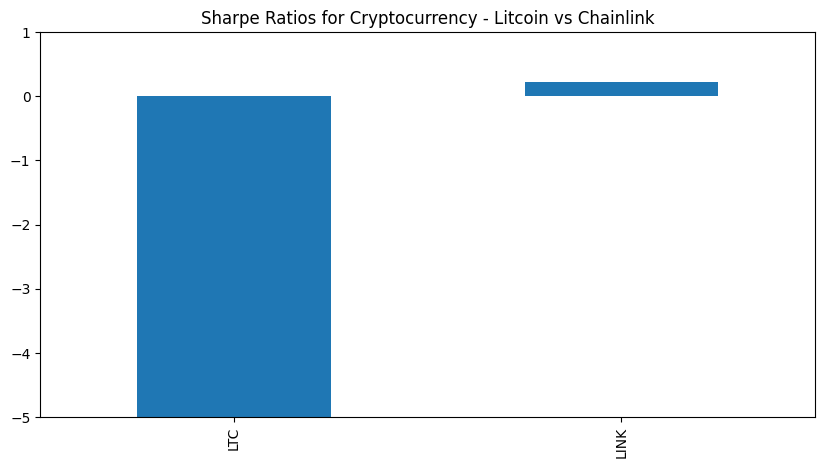

In [31]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot.bar(ylim=(-5, 1), figsize=(10,5), title = "Sharpe Ratios for Cryptocurrency - Litcoin vs Chainlink")

### What is the correlation between Litecoin and Chainlink? 

In [32]:
# co_relation of LTC and LINK
#correlation_crypto = df_daily_return_crypto.corr()
correlation_crypto = df_crypto_price.corr()
correlation_crypto


,LTC,LINK
LTC,1.000000,-0.135676
LINK,-0.135676,1.000000


<AxesSubplot:>

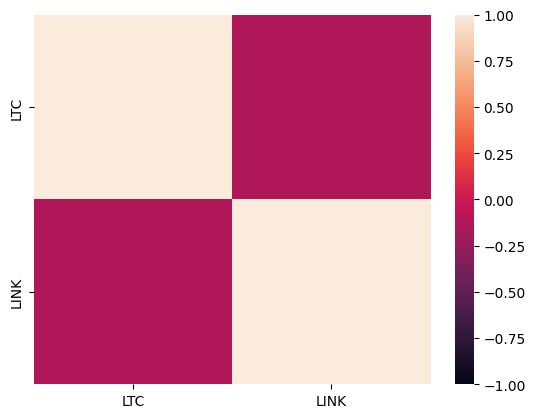

In [33]:
# # Use the `heatmap` function from the seaborn library to visualize correlations for cryptocurrency
sns.heatmap(correlation_crypto, vmin=-1, vmax=1)

In [34]:
# Check if there is null value
df_crypto_price.isnull().sum()

LTC     1
LINK    1
dtype: int64

From above analysis regarding annual standard deviation, sharpe ratios and correlation, we come to Litcoin is more stable.

# Part 2 - Apple and Tesla Stock Analysis

In [116]:
# Read the Apple CSV into DataFrame and display a few rows
appl_df = pd.read_csv('AppleData.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
display(appl_df.head())
display(appl_df.tail())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-09-28,$149.84,146691400,$147.64,$150.6414,$144.84
2022-09-27,$151.76,84442740,$152.74,$154.72,$149.945
2022-09-26,$150.77,93339410,$149.66,$153.7701,$149.64
2022-09-23,$150.43,96029910,$151.19,$151.47,$148.56
2022-09-22,$152.74,86652540,$152.38,$154.47,$150.91


,Close/Last,Volume,Open,High,Low
Date,,,,,
2017-10-05,$38.8475,84863480,$38.545,$38.86,$38.5125
2017-10-04,$38.37,80355760,$38.4075,$38.465,$38.115
2017-10-03,$38.62,64867200,$38.5025,$38.7725,$38.4775
2017-10-02,$38.4525,74526160,$38.565,$38.6125,$38.18
2017-09-29,$38.53,104818680,$38.3025,$38.5325,$38


In [117]:
# Drop Volume, Open, High and Low, leave Closed price only
appl_df = appl_df.drop(columns=['Volume', 'Open', 'High', 'Low'])
appl_df.head()

,Close/Last
Date,
2022-09-28,$149.84
2022-09-27,$151.76
2022-09-26,$150.77
2022-09-23,$150.43
2022-09-22,$152.74


In [118]:
# Rename the column name to APPL
columns = ['APPLE']
appl_df.columns = columns
appl_df['APPLE'] = appl_df['APPLE'].str.replace("$", "")
appl_df['APPLE'] = appl_df['APPLE'].astype("float")
appl_df.head()

,APPLE
Date,
2022-09-28,149.84
2022-09-27,151.76
2022-09-26,150.77
2022-09-23,150.43
2022-09-22,152.74


In [104]:
# Read the Tesla CSV into DataFrame and display a few rows
tesla_df = pd.read_csv('TeslaData.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
display(tesla_df.head())
display(tesla_df.tail())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-09-28,$287.81,54664810,$283.08,$289,$277.57
2022-09-27,$282.94,61925190,$283.84,$288.67,$277.51
2022-09-26,$276.01,58076910,$271.83,$284.09,$270.31
2022-09-23,$275.33,63748360,$283.09,$284.5,$272.82
2022-09-22,$288.59,70545410,$299.86,$301.29,$285.82


,Close/Last,Volume,Open,High,Low
Date,,,,,
2017-10-05,$23.6887,62518664,$23.7333,$23.829,$23.4233
2017-10-04,$23.6673,122219864,$23.4167,$23.908,$23.3067
2017-10-03,$23.2093,151838174,$22.3933,$23.2367,$22.0853
2017-10-02,$22.7687,78413166,$22.8347,$22.9133,$22.3673
2017-09-29,$22.74,76485727,$22.7907,$22.9787,$22.5734


In [105]:
# Drop Volume, Open, High and Low, leave Closed price only
tesla_df = tesla_df.drop(columns=['Volume', 'Open', 'High', 'Low'])
tesla_df.head()

,Close/Last
Date,
2022-09-28,$287.81
2022-09-27,$282.94
2022-09-26,$276.01
2022-09-23,$275.33
2022-09-22,$288.59


In [106]:
# Rename the column name to TESLA
columns = ['TESLA']
tesla_df.columns = columns
tesla_df['TESLA'] = tesla_df['TESLA'].str.replace("$", "")
tesla_df['TESLA'] = tesla_df['TESLA'].astype("float")
tesla_df.head()

,TESLA
Date,
2022-09-28,287.81
2022-09-27,282.94
2022-09-26,276.01
2022-09-23,275.33
2022-09-22,288.59


In [107]:
# Concatenate the cryptocurrency portfolio DataFrames
df_portfolio_stock = pd.concat([appl_df, tesla_df],axis="columns", join="inner")
df_portfolio_stock.head()

,APPLE,TESLA
Date,,
2022-09-28,149.84,287.81
2022-09-27,151.76,282.94
2022-09-26,150.77,276.01
2022-09-23,150.43,275.33
2022-09-22,152.74,288.59


In [108]:
# check if there is null value
df_portfolio_stock.isnull().sum()

APPLE    0
TESLA    0
dtype: int64

### For section 2 stock, we will analyze Apple and Tesla stock performance by using Morte Carlo Stimulation to predict the future performance by using x years dataframe.


In [43]:
# Daily return for Apple and Tesla
daily_return_stock = df_portfolio_stock.pct_change()
daily_return_stock = daily_return_stock.dropna()
daily_return_stock.head()

,APPLE,TESLA
Date,,
2022-09-27,0.012814,-0.016921
2022-09-26,-0.006523,-0.024493
2022-09-23,-0.002255,-0.002464
2022-09-22,0.015356,0.048160
2022-09-21,0.006416,0.042309


### Beta Calculation for Stocks

In [92]:
# mean of daily return
mean_return_stock = daily_return_stock.mean()

# standard deviation of daily return
standard_dev_stock = daily_return_stock.std()

# Beta,variance and co-variance
covariance_stock = daily_return_stock.cov()
variance_stock = daily_return_stock.var()


In [81]:
# beta for APPLE and TESLA

beta_apple = covariance_stock.loc['APPLE', 'TESLA']/variance_stock['TESLA']
beta_tesla = covariance_stock.loc['APPLE', 'TESLA']/variance_stock['APPLE']


In [82]:
print(beta_apple , beta_tesla)

0.24274768114537662 0.9394630853931448


In [97]:
print(appl_df.columns.get_level_values(0).unique())

Index(['close'], dtype='object')


In [115]:
# if not "daily_return" in appl_df.columns.get_level_values(0).unique():
#     close_df = appl_df.xs('close',axis=1).pct_change()
#     tickers = appl_df.columns.get_level_values(0).unique()
#     column_names = [(x,"daily_return") for x in tickers]
#     close_df.columns = pd.MultiIndex.from_tuples(column_names)
#     appl_df = appl_df.merge(close_df,left_index=True,right_index=True).reindex(columns=tickers,level=0)

#     print('lol')

In [88]:
appl_df

,APPLE
Date,
2022-09-28,149.8400
2022-09-27,151.7600
2022-09-26,150.7700
2022-09-23,150.4300
2022-09-22,152.7400
...,...
2017-10-05,38.8475
2017-10-04,38.3700
2017-10-03,38.6200


In [119]:
appl_df.rename(columns={'APPLE' : 'close'}, inplace=True)

appl_df= pd.concat([appl_df], axis=1, keys='APPLE')
appl_df

,A
,close
Date,
2022-09-28,149.8400
2022-09-27,151.7600
2022-09-26,150.7700
2022-09-23,150.4300
2022-09-22,152.7400
...,...
2017-10-05,38.8475
2017-10-04,38.3700


### Weighted 2 stocks by using Morte Carlo Simulation to forcast 3 years returns

In [120]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_APPLE = MCSimulation(
    portfolio_data = appl_df,
    num_simulation = num_sims,
    num_trading_days = 756
)

### Calculatate cummulative return

In [121]:
MC_APPLE.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017891,1.032548,0.969802,0.976672,0.987078,0.986502,0.959654,0.964908,0.983074,0.985590,...,1.003282,1.018708,0.996196,0.982588,0.993590,1.031647,1.006670,0.968547,1.012395,1.001982
2,1.051067,1.043513,0.999471,0.962409,1.003809,0.961748,0.950129,0.970733,0.961999,1.000509,...,1.016145,1.043330,0.979847,1.000801,0.976371,1.050096,0.980143,0.939319,1.009651,1.060705
3,1.066985,1.068102,1.004186,0.976405,1.024811,0.970979,0.956324,0.966358,0.976349,0.996404,...,1.021399,1.029669,0.956216,0.995499,0.965255,1.060301,0.995923,0.927743,1.020767,0.995826
4,1.034683,1.005945,0.992007,0.942047,1.044022,0.987104,0.973848,0.974144,0.979235,1.000939,...,0.979538,1.008570,0.946387,0.996660,0.967698,1.055599,1.044271,0.915898,0.994877,1.010205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.308276,0.378795,0.389292,0.252718,0.416830,0.448997,0.273844,1.161446,0.571236,0.564896,...,0.383471,1.216278,0.611367,0.118797,0.635907,0.364307,0.318480,0.278525,1.170363,0.331854
753,0.311252,0.391993,0.391865,0.253031,0.407708,0.457689,0.269650,1.150589,0.562292,0.562504,...,0.387858,1.200589,0.610119,0.114637,0.626723,0.364790,0.312633,0.273848,1.187531,0.327617
754,0.306264,0.387501,0.391525,0.243999,0.399001,0.454916,0.270170,1.161459,0.567464,0.580754,...,0.377084,1.237516,0.607898,0.114355,0.612588,0.355394,0.329408,0.264586,1.198225,0.317524
755,0.318358,0.393576,0.390207,0.241870,0.397729,0.456496,0.266904,1.141793,0.553253,0.576113,...,0.382850,1.218865,0.604133,0.114232,0.579877,0.364097,0.332354,0.260552,1.268540,0.317975


### Plot simulation outcomes with normal distribution to see all possible outcome by percentage

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

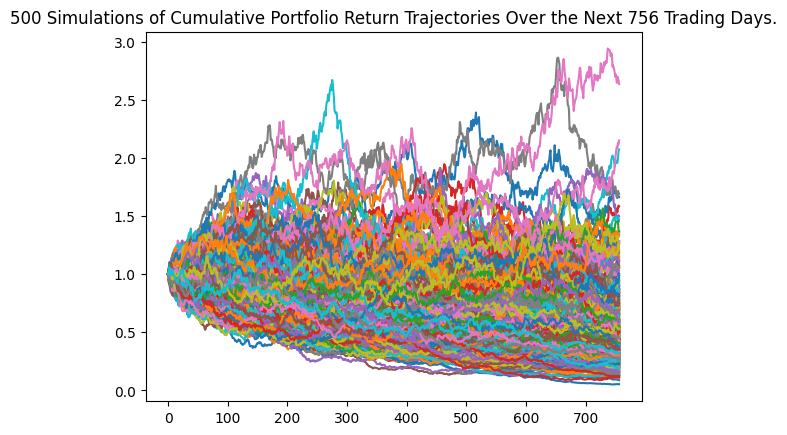

In [122]:
MC_APPLE.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

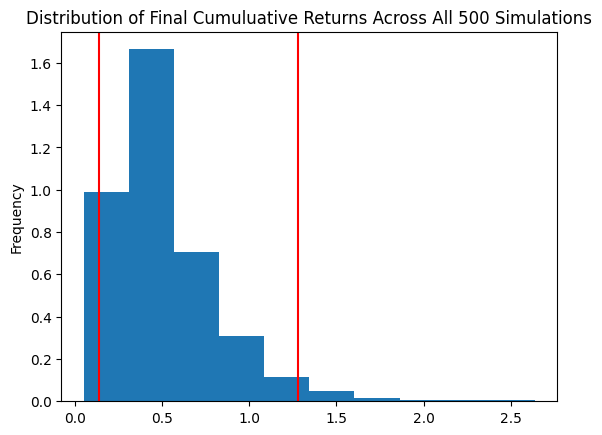

In [123]:
MC_APPLE.plot_distribution()

In [124]:
MC_APPLE.summarize_cumulative_return()

count           500.000000
mean              0.515903
std               0.312777
min               0.053226
25%               0.305340
50%               0.436875
75%               0.636201
max               2.638107
95% CI Lower      0.142348
95% CI Upper      1.283066
Name: 756, dtype: float64